<a href="https://colab.research.google.com/github/takumi0427/PythonPractice/blob/master/P02_numpy.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Practice02 Numpyによる配列計算

##Numpyとは
Pythonで学術計算をするためのライブラリ  
計算が高速になったり、より楽になったり．  
機械学習などのライブラリでも頻繁に使われるため，必須知識である．  
(https://algorithm.joho.info/programming/python/numpy-sample-code/)

##ライブラリ

In [0]:
import numpy as np
import scipy.stats as sst
#結果を可視化するためのパッケージmatplotlib（別途解説）
import matplotlib.pyplot as plt

##1次元配列ベクトル

In [0]:
print(np.arange(0, 5))
print(np.arange(0, 12, 3))

[0 1 2 3 4]
[0 3 6 9]


####等差数列

In [0]:
np.linspace(start=1, stop=11, num=10)

array([ 1.        ,  2.11111111,  3.22222222,  4.33333333,  5.44444444,
        6.55555556,  7.66666667,  8.77777778,  9.88888889, 11.        ])

####ソート・条件抽出

In [0]:
#降順は[::-1]
sarr = np.array([3,5,1])
print(np.sort(sarr)); print()
print(np.sort(sarr)[::-1]); print()

#条件にあった数字だけ出力
b = sarr > 1
print(sarr[b])

[1 3 5]

[5 3 1]

[3 5]


####重複除去

In [0]:
#通常のリストの場合はset関数
sample = [1,2,3,3,4,4,4]
print(set(sample)); print()

#numpyの場合はunique関数
#2次元以上でも適用可能
sample2 = np.array(sample)
print(np.unique(sample2)); print()
#ユニーク要素の個数
print(np.unique(sample2,return_counts=True)); print()
#ユニーク要素が最初に出た位置
print(np.unique(sample2,return_index=True))


{1, 2, 3, 4}

[1 2 3 4]

(array([1, 2, 3, 4]), array([1, 1, 2, 3]))

(array([1, 2, 3, 4]), array([0, 1, 2, 4]))


##2次元配列

In [0]:
#2次元配列作成
arr1 = np.array([[1,2,3],[3,4,5]])
print(arr1.dtype); print()
print(arr1.size); print()
print(arr1.shape); print()

#データ型を同時に定義
arr1 = np.array([[1,2,3],[3,4,5]],dtype=np.int32)
print(arr1);print()
#データ型を変更 
arr2 = arr1.astype(np.float32)
print(arr2)

int64

6

(2, 3)

[[1 2 3]
 [3 4 5]]

[[1. 2. 3.]
 [3. 4. 5.]]


###要素の取得

In [0]:
print(arr1[0])
print(arr1[0][0])
# 行, 列の直接指定
print(arr1[0, 0])
# スライス
print(arr1[1:2])
print(arr1[1:])
print(arr1[:1])

[1 2 3]
1
1
[[3 4 5]]
[[3 4 5]]
[[1 2 3]]


##ゼロ行列，単位行列

In [0]:
#ゼロ行列
print(np.zeros((2, 3))); print()
#単位行列
print(np.identity(4)); print()
#全て任意の値
print(np.ones((4, 4))); print()
print(np.full((3, 3), 99))

[[0. 0. 0.]
 [0. 0. 0.]]

[[1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]]

[[1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]
 [1. 1. 1. 1.]]

[[99 99 99]
 [99 99 99]
 [99 99 99]]


##空の配列
中身を0や1のように初期化しないので生成が速い   
その時メモリの残っているデータから要素を生成

In [0]:
np.empty(10, np.int)

array([4607182418800017408, 4611936218406686265, 4614438218199669874,
       4616564918023705942, 4617815917920197746, 4619066917816689550,
       4620317917713181355, 4621131067645901028, 4621756567594146930,
       4622382067542392832])

##乱数行列

###一様分布

0.816951378052722

[[0.52313642 0.35737139 0.68443605]
 [0.11058706 0.63715374 0.38683381]]

3.641908078678007

[[9 7 7]
 [9 5 4]
 [9 9 7]]


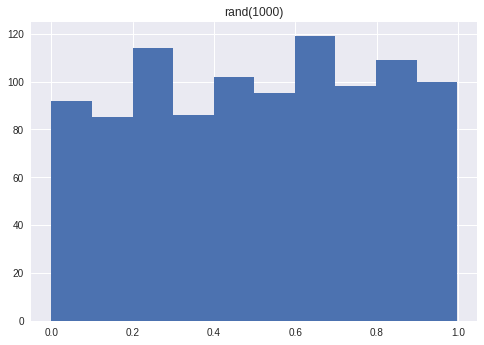

In [0]:
# 一様分布　0～1の範囲から
print(np.random.rand());print()
print(np.random.rand(2, 3));print()
plt.hist(np.random.rand(1000));plt.title("rand(1000)")
# 一様分布　任意の範囲から
print((5 - 2) * np.random.rand() + 2);print()
# 一様分布　整数値取得
print(np.random.randint(4, 10, (3, 3)))

###正規分布　normal distribution　Gaussian distribution
平均0，標準偏差1

[[ 0.39432213  0.30520788  1.53131943]
 [-0.70462806  0.79198126 -0.01059251]
 [-0.60959008 -0.36810155 -2.2550662 ]]

[[-1.8725726  -1.55212946 -1.9978436 ]
 [-2.61052951 -1.52464456 -2.391567  ]
 [-2.29424242 -2.0187982  -3.0000185 ]]


Text(0.5, 1.0, 'normal(-2, 0.5, 1000)')

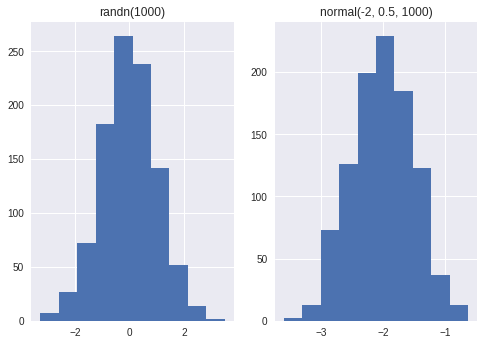

In [0]:
print(np.random.randn(3, 3));print()
plt.subplot(121)
plt.hist(np.random.randn(1000));plt.title("randn(1000)")
# 正規分布（任意の平均、標準偏差）
print(np.random.normal(-2, 0.5, (3, 3)))
plt.subplot(122)
plt.hist(np.random.normal(-2, 0.5, 1000));plt.title("normal(-2, 0.5, 1000)")

###二項分布　binomial distribution
結果が成功か失敗のいずれかである試行（ベルヌーイ試行）を独立にn回行ったときの成功回数を確率変数とする離散確率分布である。  
ただし、各試行における成功確率 p は一定とする。

[3 7 3 3]


Text(0.5, 1.0, 'binomial(n=10,p=0.5,sample=1000)')

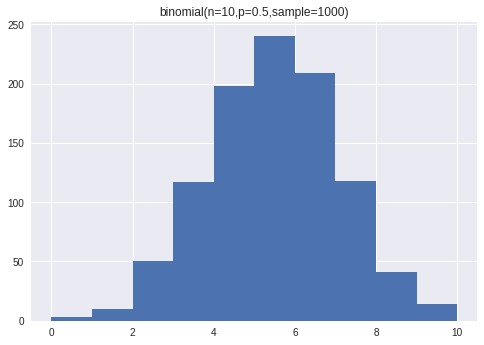

In [0]:
n = 10
p = 0.5
print(np.random.binomial(n, p, 4))
plt.hist(np.random.binomial(n, p, 1000));plt.title("binomial(n="+str(n)+",p="+str(p)+",sample=1000)")

###ベータ分布　beta distribution
ベイズ統計学において二項分布の共役事前分布として登場する有名な分布  
パラメータa,bで分布形状が大きく異なる．

Text(0.5, 1.0, 'beta(a=2,b=2,sample=1000)')

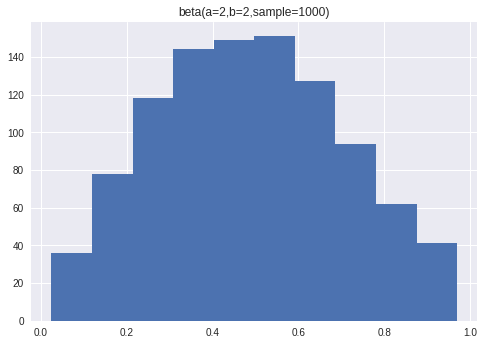

In [0]:
a=2
b=2
plt.hist(np.random.beta(a, b, 1000));plt.title("beta(a="+str(a)+",b="+str(b)+",sample=1000)")

###ガンマ分布　gamma distribution
その性質は形状母数 k、尺度母数 θ の2つの母数で特徴づけられる。  
主に信頼性工学における電子部品の寿命分布や通信工学におけるトラフィックの待ち時間分布に応用される。  
また所得分布にも応用される。

Text(0.5, 1.0, 'gamma(k=5,θ=1,sample=1000)')

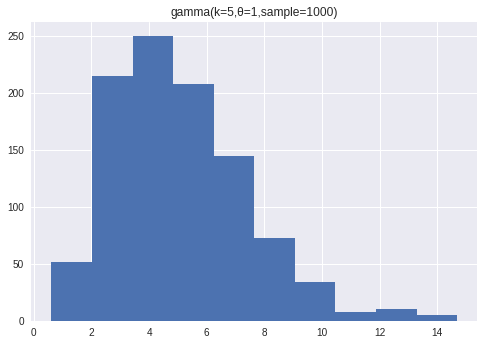

In [0]:
k  = 5
tt = 1
plt.hist(np.random.gamma(k, tt, 1000));plt.title("gamma(k="+str(k)+",θ="+str(tt)+",sample=1000)")

###カイ二乗分布 
推計統計学で最も広く利用される

Text(0.5, 1.0, 'chisquare(df=5,sample=1000)')

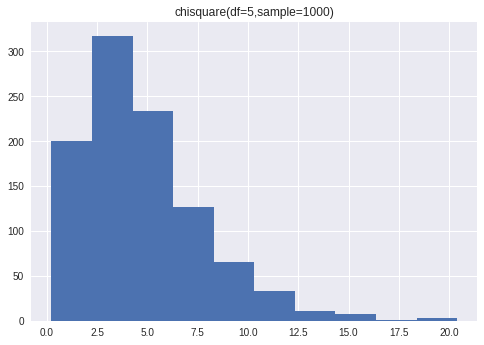

In [0]:
df = 5 #自由度
plt.hist(np.random.chisquare(df, 1000));plt.title("chisquare(df="+str(df)+",sample=1000)")

In [0]:
#サイズ（行数，列数）タプル
arr2.shape

(2, 3)

##配列の整形

###リシェイプ

In [0]:
arr3 = np.array([[1, 3, 5, 7], [2, 4, 6, 8], [9, 10, 11,12]])
print(arr3); print()
#行数列数を任意に設定
print(np.reshape(arr3, (2, 6))); print()
#転置
print(arr3.T); print()
#1列に
print(arr3.flatten())

[[ 1  3  5  7]
 [ 2  4  6  8]
 [ 9 10 11 12]]

[[ 1  3  5  7  2  4]
 [ 6  8  9 10 11 12]]

[[ 1  2  9]
 [ 3  4 10]
 [ 5  6 11]
 [ 7  8 12]]

[ 1  3  5  7  2  4  6  8  9 10 11 12]


###列方向に結合

In [0]:
a = np.array([[1, 3, 5], [2, 4, 6]])
b = [[7, 9, 11], [8, 10, 12]]
print(np.hstack([a,b])); print()
print(np.c_[a, b])


[[ 1  3  5  7  9 11]
 [ 2  4  6  8 10 12]]

[[ 1  3  5  7  9 11]
 [ 2  4  6  8 10 12]]


###行方向に結合

In [0]:
print(np.vstack([a,b])); print()
print(np.r_[a, b])

[[ 1  3  5]
 [ 2  4  6]
 [ 7  9 11]
 [ 8 10 12]]

[[ 1  3  5]
 [ 2  4  6]
 [ 7  9 11]
 [ 8 10 12]]


###結合はconcatenateを使うと便利
第3引数を0とするとvstack，1とするとhstack

In [0]:
print(np.concatenate([a, b], 0))
print(np.concatenate([a, b], 1))

[[ 1  3  5]
 [ 2  4  6]
 [ 7  9 11]
 [ 8 10 12]]
[[ 1  3  5  7  9 11]
 [ 2  4  6  8 10 12]]


##基本計算

要素を一括して四則演算

In [0]:
a = np.array([[1, 3, 5], [2, 4, 6]])
b = [[7, 9, 11], [8, 10, 12]]
print(3 * a + 2); print()
print(np.add(a,b))
print(a + b)
print(np.subtract(b,a))
print(b - a)

[[ 5 11 17]
 [ 8 14 20]]

[[ 8 12 16]
 [10 14 18]]
[[ 8 12 16]
 [10 14 18]]
[[6 6 6]
 [6 6 6]]
[[6 6 6]
 [6 6 6]]


####行列計算

In [0]:
M = np.asarray([[1,2,3], [2,3,4]])
N = np.asarray([[1,2],[3,4], [5,6]])
M.dot(N)

array([[22, 28],
       [31, 40]])

##★要約統計量
2次元の場合は，axisで行列方向を指定（0 =行方向）  
axis無しは全ての要素から計算

In [0]:
arr = np.array([[1,2,5,5], [2,3,3,1], [5,7,3,5]])
print("Data",arr)
print("合計",np.sum(arr, axis=0))

#代表値
print("相加平均",np.mean(arr,axis=1))
print("最頻値",sst.mode(arr))
print("中央値",np.median(arr))
print("パーセンタイル値",np.percentile(arr, 95, axis=0))

#ばらつき
print("標本分散n",np.var(arr))
print("不偏分散n-1",np.var(arr,ddof=1))
print("標本標準偏差n",np.std(arr,axis=0))
print("不偏標準偏差n-1",np.std(arr,axis=0,ddof=1))
print("標本分散nによる正規化",sst.zscore(arr[0]))
print("不偏分散n-1による正規化",sst.zscore(arr[0],ddof=1))
print("共分散",np.cov(arr[0],arr[2]))
print("相関係数",np.corrcoef(arr[0],arr[2])[0,0])

#範囲
print("最小値",np.min(arr,axis=0))
print("最大値",np.max(arr))
print("最大値の位置",np.argmax(np.array([3,1,8])))
print("最小値の位置",np.argmin(np.array([3,1,8])))

#累積
print("累積和",arr.cumsum(1))
print("累積積",np.cumprod(arr))

#分布形状
print("尖度",sst.kurtosis(arr))
print("歪度",sst.skew(arr))

#一括統計量
print("基本統計量",sst.describe(arr,axis=1))

#数学
print("指数関数EXP",np.exp(arr))
print("平方根",np.sqrt(arr))
print("対数変換",np.log(arr))
print("自然数",np.e)
print("円周率",np.pi)
print(np.gradient(np.array([1,3,5,1,8])))
print(np.diff(np.array([1,3,5,1,8])))

Data [[1 2 5 5]
 [2 3 3 1]
 [5 7 3 5]]
合計 [ 8 12 11 11]
相加平均 [3.25 2.25 5.  ]
最頻値 ModeResult(mode=array([[1, 2, 3, 5]]), count=array([[1, 1, 2, 2]]))
中央値 3.0
パーセンタイル値 [4.7 6.6 4.8 5. ]
標本分散n 3.25
不偏分散n-1 3.5454545454545454
標本標準偏差n [1.69967317 2.1602469  0.94280904 1.88561808]
不偏標準偏差n-1 [2.081666   2.64575131 1.15470054 2.30940108]
標本分散nによる正規化 [-1.26025208 -0.70014004  0.98019606  0.98019606]
不偏分散n-1による正規化 [-1.09141031 -0.60633906  0.84887469  0.84887469]
共分散 [[ 4.25       -2.        ]
 [-2.          2.66666667]]
相関係数 1.0
最小値 [1 2 3 1]
最大値 7
最大値の位置 2
最小値の位置 1
累積和 [[ 1  3  8 13]
 [ 2  5  8  9]
 [ 5 12 15 20]]
累積積 [     1      2     10     50    100    300    900    900   4500  31500
  94500 472500]
尖度 [-1.5 -1.5 -1.5 -1.5]
歪度 [ 0.52800498  0.59517006  0.70710678 -0.70710678]
基本統計量 DescribeResult(nobs=4, minmax=(array([1, 1, 3]), array([5, 3, 7])), mean=array([3.25, 2.25, 5.  ]), variance=array([4.25      , 0.91666667, 2.66666667]), skewness=array([-0.11531718, -0.4933822 ,  0.        ]),

##畳み込み演算・移動平均

In [0]:
a = np.array([0, 1, 2, 3, 4, 5])
v = np.array([0.2, 0.8])
print("same",np.convolve(a,v, mode='same'))
print("full",np.convolve(a, v, mode='full'))
print("valid",np.convolve(a, v, mode='valid'))

same [0.  0.2 1.2 2.2 3.2 4.2]
full [0.  0.2 1.2 2.2 3.2 4.2 4. ]
valid [0.2 1.2 2.2 3.2 4.2]


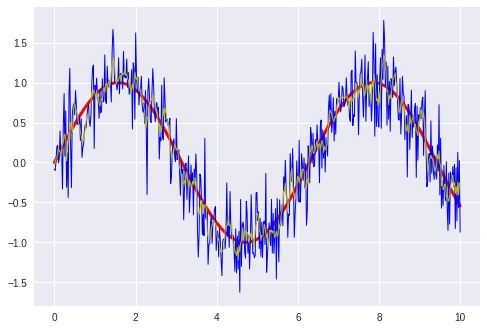

In [0]:
x  = np.linspace(0, 10, 500)
y1 = np.sin(x) # まずは元の信号を
y2 = y1 + np.random.randn(500)*0.3 # ノイズを混ぜる
v  = np.ones(5)/5.0 # 移動平均をとるための配列vを設定。今回は前後５つの値を用いて平均をとる。
y3 = np.convolve(y2, v, mode='same')  # グラフを描く都合上'same'で。
plt.plot(x, y1,'r',linewidth=3)
plt.plot(x, y2,'b',linewidth=1)
plt.plot(x, y3,'y',linewidth=1)
plt.show()

##配列同士の計算

In [0]:
#c2にc1の要素があれば出力
c1 = np.array(['A', 'B', 'C', 'D', 'A', 'D', 'G'])
c2 = np.array(['B', 'C', 'D', 'F', 'G', 'I'])
np.in1d(c1, c2)

array([False,  True,  True,  True, False,  True,  True])

In [0]:
#共通する要素があれば出力
np.intersect1d(c1, c2)

array(['B', 'C', 'D', 'G'], dtype='<U1')

In [0]:
#つなげてユニーク要素出力（ソート済み）
np.union1d(c1, c2)

array(['A', 'B', 'C', 'D', 'F', 'G', 'I'], dtype='<U1')